# Telecom Churn Case Study

### By
- Abhishek Kumar
- Geeta Kumari

### Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Business Goal

- To predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.
- To identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.


# Table of Content

1. [Loading the Libraries and the Dataset](#load)


2. [Data Preparation](#dp)

    - [Missing Data](#md)
    
    - [Filtering High-Value Custormers](#hvc)
    
    - [Derive Churn](#tagchurn)
    
    - [Outliers treatment](#outliers)
      
    - [Derived Variable](#dv)


3. [EDA](#eda)

    - [Univariate Analysis](#uv)
    
    - [Bivariate Analysis](#bv)
    
    - [Multivariate Analysis](#mv)
    

4. [Modelling](#mod)

    - [Train Test split](#tts)
    
    - [SMOTE](#smote)
    
    - [Scaling the dataset](#scale)
    
    - [PCA](#pca)
    
    - [Model 1 - Logestic Regression](#model1)
    
    - [Model 2 - Logestic Regression with GridSearch](#model2)
    
    - [Model 3 - Random Forest](#model3)
    
    
5. [Feature Importance](#fi)  
    
    - [Intercepting the important features](#impfeat)
       
       
6. [Conclusion](#con)

## Loading the Libraries and the Dataset <a class ="anchor" id="load"></a>

In [226]:
import pandas as pd                                           #import pandas with the alias pd
import numpy as np                                            #import numpy with the alias np
import matplotlib.pyplot as plt                               #import matplotlib.pyplot with the alias plt
import seaborn as sns                                         #import seaborn with the alias sns

import warnings                    
warnings.filterwarnings('ignore')                             # import warning anddepostion as 'ignore' to never print matching warnings

pd.set_option("max_rows", 500)                                #setting maximum rows to 500
pd.set_option("max_columns", 500)                             #setting maximum columns to 500  

from fancyimpute import IterativeImputer as II                #import IterativeImputer with the alias as II

from sklearn.model_selection import train_test_split          #import train_test_split to split the data into train and test set
from imblearn.over_sampling import SMOTE                      #import SMOTE to remove imbalance between two class
from sklearn.preprocessing import StandardScaler              #import StandardScaler for dataset scaling
from sklearn.decomposition import PCA                         #import PCA for modelling
from sklearn.model_selection import GridSearchCV              #import GridSearchCV
from sklearn.model_selection import StratifiedKFold           #import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier           #import RandomForestClassifier
from sklearn.linear_model import LogisticRegression           #import LogisticRegression
from sklearn.metrics import confusion_matrix                  #import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support  #sensitivity_specificity_support 
from sklearn.metrics import roc_auc_score                     #import roc_auc_score
from sklearn.metrics import classification_report             #import classification_report
from sklearn.metrics import roc_curve                         #import roc_curve
from sklearn.ensemble import ExtraTreesClassifier             #import ExtraTreesClassifier
from sklearn.feature_selection import RFE                     #importing RFE to do feature selection

In [2]:
# read the data
data = pd.read_csv("telecom_churn_data.csv")

In [3]:
# look at initial rows of the data
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# Checking the columns in the dataset
data.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

In [5]:
# Checking the feature type summary
data.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
# look at data statistics
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [7]:
# shape of the data
data.shape

(99999, 226)

In [8]:
# Keeping the original file
original_df = data.copy()

## Data Preparation<a class ="anchor" id="dp"></a>

In [9]:
# Droping mobile_number & circle_id because it won't have any effect
data = data.drop(columns = ['mobile_number', 'circle_id'], axis=1)

# Droping date columns because it won't have any effect
data = data[data.columns.drop(list(data.filter(regex = 'date')))]

### Missing Data <a class ="anchor" id="md"></a>

In [10]:
# Checkthe percentage of missing values
missing_value_percent = data.isnull().sum()*100/data.shape[0]
missing_value_percent

loc_og_t2o_mou         1.018010
std_og_t2o_mou         1.018010
loc_ic_t2o_mou         1.018010
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
arpu_9                 0.000000
onnet_mou_6            3.937039
onnet_mou_7            3.859039
onnet_mou_8            5.378054
onnet_mou_9            7.745077
offnet_mou_6           3.937039
offnet_mou_7           3.859039
offnet_mou_8           5.378054
offnet_mou_9           7.745077
roam_ic_mou_6          3.937039
roam_ic_mou_7          3.859039
roam_ic_mou_8          5.378054
roam_ic_mou_9          7.745077
roam_og_mou_6          3.937039
roam_og_mou_7          3.859039
roam_og_mou_8          5.378054
roam_og_mou_9          7.745077
loc_og_t2t_mou_6       3.937039
loc_og_t2t_mou_7       3.859039
loc_og_t2t_mou_8       5.378054
loc_og_t2t_mou_9       7.745077
loc_og_t2m_mou_6       3.937039
loc_og_t2m_mou_7       3.859039
loc_og_t2m_mou_8       5.378054
loc_og_t2m_mou_9       7.745077
loc_og_t

In [11]:
# crating a recharge varibles list
rech_var = list(data.filter(regex = 'rech'))
rech_var

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [12]:
# checking rech variables missing values
data[rech_var].isnull().sum()*100/data.shape[0]

total_rech_num_6       0.000000
total_rech_num_7       0.000000
total_rech_num_8       0.000000
total_rech_num_9       0.000000
total_rech_amt_6       0.000000
total_rech_amt_7       0.000000
total_rech_amt_8       0.000000
total_rech_amt_9       0.000000
max_rech_amt_6         0.000000
max_rech_amt_7         0.000000
max_rech_amt_8         0.000000
max_rech_amt_9         0.000000
total_rech_data_6     74.846748
total_rech_data_7     74.428744
total_rech_data_8     73.660737
total_rech_data_9     74.077741
max_rech_data_6       74.846748
max_rech_data_7       74.428744
max_rech_data_8       73.660737
max_rech_data_9       74.077741
count_rech_2g_6       74.846748
count_rech_2g_7       74.428744
count_rech_2g_8       73.660737
count_rech_2g_9       74.077741
count_rech_3g_6       74.846748
count_rech_3g_7       74.428744
count_rech_3g_8       73.660737
count_rech_3g_9       74.077741
av_rech_amt_data_6    74.846748
av_rech_amt_data_7    74.428744
av_rech_amt_data_8    73.660737
av_rech_

In [13]:
# We can impute the missing values in reach variablc with zeros as this means that the customer did not rechage in the given month
data[rech_var] = data[rech_var].apply(lambda x: x.fillna(0))

In [14]:
#All categorical variables in cat_col
cat_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']

# checking categorical variables missing values
data[cat_cols].isnull().sum()*100/data.shape[0]

night_pck_user_6    74.846748
night_pck_user_7    74.428744
night_pck_user_8    73.660737
night_pck_user_9    74.077741
fb_user_6           74.846748
fb_user_7           74.428744
fb_user_8           73.660737
fb_user_9           74.077741
dtype: float64

In [15]:
# number of distinct values in categorical columns
data[cat_cols].nunique()

night_pck_user_6    2
night_pck_user_7    2
night_pck_user_8    2
night_pck_user_9    2
fb_user_6           2
fb_user_7           2
fb_user_8           2
fb_user_9           2
dtype: int64

In [16]:
# Since these categorical variables are binary i.e. 0s and 1s, we do not have a definate value to fill the NaN values
# Hence we will trasform the NaN values into a new category (-999)

data[cat_cols] = data[cat_cols].apply(lambda x: x.fillna(-999))

In [17]:
# checking null values in the dataset
data.isnull().sum()*100/data.shape[0]
data.apply(lambda x: x.count()*100/data.shape[1], axis = 1).sort_values()

2470      40.09434
49153     40.09434
83794     40.09434
49211     40.09434
83639     40.09434
           ...    
79276    100.00000
9146     100.00000
16694    100.00000
61926    100.00000
57591    100.00000
Length: 99999, dtype: float64

In [18]:
# Removing columns with more than 70% missing values
drop_col_70 = ['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9',
              'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9']

data = data.drop(columns = drop_col_70, axis=1)

In [19]:
%%time

# using IterativeImputer technique to impute missing values in the rest of the columns
data_imputed = II().fit_transform(data)

CPU times: user 3h 56min 28s, sys: 21min 16s, total: 4h 17min 45s
Wall time: 1h 17min 53s


In [20]:
data_cols = data.columns

# to conver ndarray to a pandas dataframe
data_imputed = pd.DataFrame(data_imputed, columns = data_cols)

data_imputed.isnull().sum().sum()

0

In [21]:
print(data_imputed.isnull().sum().sum())
print(data_imputed.shape)

0
(99999, 204)


In [192]:
#data_imputed.to_csv("telecom_data_imputed1.csv", index = False)
#data_imputed = pd.read_csv("telecom_data_imputed1.csv")

### Filtering High-Value Custormers<a class ="anchor" id="hvc"></a>

In [193]:
# Calculating the avg reach amount of calling and data for the good phase

data_imputed['total_rech_amt_data_6'] = (data_imputed.total_rech_data_6 * data_imputed.av_rech_amt_data_6) +  data_imputed.total_rech_amt_6
data_imputed['total_rech_amt_data_7'] = (data_imputed.total_rech_data_7 * data_imputed.av_rech_amt_data_7) +  data_imputed.total_rech_amt_7

data_imputed['avg_rech_amt_good_phase'] = (data_imputed.total_rech_amt_data_6 + data_imputed.total_rech_amt_data_7)/2


In [194]:
# 70th percentile of recharge amount
print("70th percentile: ", data_imputed.avg_rech_amt_good_phase.quantile(0.7))

70th percentile:  478.0


In [195]:
# The high value customer are customer who have avg rech amount greater than 478.0
hvc_data = data_imputed.loc[data_imputed.avg_rech_amt_good_phase >= 478.0, :]
hvc_data.reset_index(drop = True, inplace = True)
hvc_data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,avg_rech_amt_good_phase
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,-95.523694,-81.933316,0.00,-107.459800,143.940499,133.173097,0.00,113.419675,28.340996,12.007736,0.00,8.035048,32.644014,12.326228,0.00,1.512434,-99.900245,-117.340904,0.00,-120.158721,93.344423,91.390566,0.00,90.462407,3.745485,3.789595,0.00,3.648211,2.427211,-2.27198,0.00,-0.071881,-2.89554,-22.166004,0.00,-26.047577,30.608504,33.136822,0.00,34.242002,87.304948,90.793295,0.00,86.274773,1.121699,1.134285,0.00,1.041568,0.0,0.0,0.0,0.0,119.023043,125.07822,0.00,121.552206,-120.396291,-107.924792,0.00,-99.937199,3.910109,4.972477,0.00,4.403393,0.442833,0.048762,0.0,0.049953,0.00,0.00,0.00,0.00,-58.910779,-63.906382,0.16,-58.745762,107.474312,107.11681,4.13,106.156244,12.085328,12.602212,1.15,12.173928,60.572055,55.776673,5.44,59.580169,-23.057781,-23.192459,0.00,-22.246954,20.721782,21.654634,0.00,19.620368,2.156151,2.219279,0.00,2.172261,0.0,0.0,0.0,0.0,-0.185407,0.680401,0

In [196]:
# Deleting the columns used for filtering
hvc_data = hvc_data.drop(columns = ['total_rech_amt_data_6', 'total_rech_amt_data_7', 'avg_rech_amt_good_phase'], axis=1)

In [197]:
# shape of the dataset after filtering out high-value customers
hvc_data.shape

(30001, 204)

### Tag Churners and remove attributes of the churn phase<a class ="anchor" id="tagchurn"></a>

In [198]:
# Calculating the total activity in churn phase
hvc_data['total_activity_9'] = hvc_data.total_ic_mou_9 + hvc_data.total_og_mou_9 + hvc_data.vol_2g_mb_9 + hvc_data.vol_3g_mb_9

# tagging the users as churned or not
hvc_data['churn'] = hvc_data.apply(lambda x: 1 if x.total_activity_9 == 0 else 0, axis = 1)

In [199]:
print("Churn Percentage:")
print(hvc_data.churn.value_counts()*100/hvc_data.shape[0])

Churn Percentage:
0    91.863605
1     8.136395
Name: churn, dtype: float64


Text(0.5, 1.0, 'Churn status Distribution')

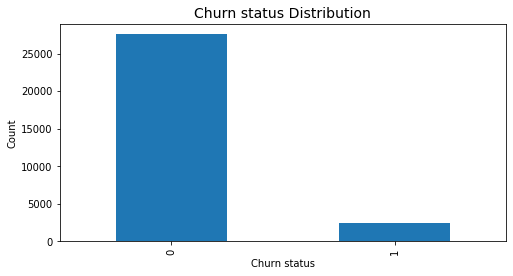

In [200]:
# plot to show churn status

plt.figure(figsize=(8,4))
hvc_data['churn'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Churn status')
plt.title('Churn status Distribution',fontsize=14)

In [201]:
# Count unique elements in each column including NaN
uniqueValues = hvc_data.nunique(dropna=False)
uniqueValues

loc_og_t2o_mou            1
std_og_t2o_mou            1
loc_ic_t2o_mou            1
arpu_6                29072
arpu_7                29084
arpu_8                28073
arpu_9                27022
onnet_mou_6           17435
onnet_mou_7           17524
onnet_mou_8           17046
onnet_mou_9           16976
offnet_mou_6          21765
offnet_mou_7          21800
offnet_mou_8          21337
offnet_mou_9          21051
roam_ic_mou_6          4593
roam_ic_mou_7          3922
roam_ic_mou_8          4607
roam_ic_mou_9          5037
roam_og_mou_6          5289
roam_og_mou_7          4531
roam_og_mou_8          5175
roam_og_mou_9          5568
loc_og_t2t_mou_6      10965
loc_og_t2t_mou_7      10931
loc_og_t2t_mou_8      11237
loc_og_t2t_mou_9      11595
loc_og_t2m_mou_6      16170
loc_og_t2m_mou_7      16211
loc_og_t2m_mou_8      16304
loc_og_t2m_mou_9      16494
loc_og_t2f_mou_6       3635
loc_og_t2f_mou_7       3637
loc_og_t2f_mou_8       4163
loc_og_t2f_mou_9       4872
loc_og_t2c_mou_6    

In [202]:
# columns with unique or only 1 value
col_with_unique_value =[ 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',  
                          'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 
                          'std_og_t2c_mou_8',  'std_ic_t2o_mou_6', 
                          'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

In [203]:
# dropping columns with unique values
churned_data = hvc_data.drop(col_with_unique_value,axis = 1)

In [204]:
#Rename Columns
churned_data.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [205]:
# deleting the churn phase variables
churned_data = churned_data[churned_data.columns.drop(list(churned_data.filter(regex = '_9')))]

In [206]:
churned_data.shape

(30001, 146)

### Capping the outliers  <a class ="anchor" id="outliers"></a>

In [207]:
num_cols = [col for col in churned_data.columns if col not in cat_cols]
num_cols.remove('churn')

In [208]:
# Here we are capping the outlier values for the numerical columns with mean +- 3*std_dev to keep the data clean of outliers.

def cap_outliers(array, k = 3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array < lower_limit] = lower_limit
    array[array > upper_limit] = upper_limit
    return array

# cap outliers in the numeric columns
churned_data[num_cols] = churned_data[num_cols].apply(cap_outliers, axis=0)

In [209]:
churned_data.shape

(30001, 146)

### Derive new features  <a class ="anchor" id="dv"></a>

In [210]:
derived_data = churned_data.copy()

# average revenue per user - avg of first 2 months and 3rd month
derived_data['arpu_2mths'] = (derived_data['arpu_6'] + derived_data['arpu_7'])/2
derived_data['arpu_3mths'] = (derived_data['arpu_6'] + derived_data['arpu_7'] + derived_data['arpu_8'])/3

# Avg total recharge avg of first 2 months and 3rd month
derived_data['avg_tot_rech_2mths'] = (derived_data['total_rech_amt_6'] + derived_data['total_rech_amt_7'])/2
derived_data['avg_tot_rech_3mths'] = (derived_data['total_rech_amt_6'] + derived_data['total_rech_amt_7'] + derived_data['total_rech_amt_8'])/3

# converting age on years from days to months
derived_data['aon_years'] = derived_data['aon']/12
derived_data['aon_years'] = derived_data['aon_years'].astype(int)

In [211]:
# Calculate difference between 8th and previous months

derived_data['arpu_diff'] = derived_data.arpu_8 - ((derived_data.arpu_6 + derived_data.arpu_7)/2)
derived_data['onnet_mou_diff'] = derived_data.onnet_mou_8 - ((derived_data.onnet_mou_6 + derived_data.onnet_mou_7)/2)
derived_data['offnet_mou_diff'] = derived_data.offnet_mou_8 - ((derived_data.offnet_mou_6 + derived_data.offnet_mou_7)/2)
derived_data['roam_ic_mou_diff'] = derived_data.roam_ic_mou_8 - ((derived_data.roam_ic_mou_6 + derived_data.roam_ic_mou_7)/2)
derived_data['roam_og_mou_diff'] = derived_data.roam_og_mou_8 - ((derived_data.roam_og_mou_6 + derived_data.roam_og_mou_7)/2)
derived_data['loc_og_mou_diff'] = derived_data.loc_og_mou_8 - ((derived_data.loc_og_mou_6 + derived_data.loc_og_mou_7)/2)
derived_data['std_og_mou_diff'] = derived_data.std_og_mou_8 - ((derived_data.std_og_mou_6 + derived_data.std_og_mou_7)/2)
derived_data['isd_og_mou_diff'] = derived_data.isd_og_mou_8 - ((derived_data.isd_og_mou_6 + derived_data.isd_og_mou_7)/2)
derived_data['spl_og_mou_diff'] = derived_data.spl_og_mou_8 - ((derived_data.spl_og_mou_6 + derived_data.spl_og_mou_7)/2)
derived_data['total_og_mou_diff'] = derived_data.total_og_mou_8 - ((derived_data.total_og_mou_6 + derived_data.total_og_mou_7)/2)
derived_data['loc_ic_mou_diff'] = derived_data.loc_ic_mou_8 - ((derived_data.loc_ic_mou_6 + derived_data.loc_ic_mou_7)/2)
derived_data['std_ic_mou_diff'] = derived_data.std_ic_mou_8 - ((derived_data.std_ic_mou_6 + derived_data.std_ic_mou_7)/2)
derived_data['isd_ic_mou_diff'] = derived_data.isd_ic_mou_8 - ((derived_data.isd_ic_mou_6 + derived_data.isd_ic_mou_7)/2)
derived_data['spl_ic_mou_diff'] = derived_data.spl_ic_mou_8 - ((derived_data.spl_ic_mou_6 + derived_data.spl_ic_mou_7)/2)
derived_data['total_ic_mou_diff'] = derived_data.total_ic_mou_8 - ((derived_data.total_ic_mou_6 + derived_data.total_ic_mou_7)/2)
derived_data['total_rech_num_diff'] = derived_data.total_rech_num_8 - ((derived_data.total_rech_num_6 + derived_data.total_rech_num_7)/2)
derived_data['total_rech_amt_diff'] = derived_data.total_rech_amt_8 - ((derived_data.total_rech_amt_6 + derived_data.total_rech_amt_7)/2)
derived_data['max_rech_amt_diff'] = derived_data.max_rech_amt_8 - ((derived_data.max_rech_amt_6 + derived_data.max_rech_amt_7)/2)
derived_data['total_rech_data_diff'] = derived_data.total_rech_data_8 - ((derived_data.total_rech_data_6 + derived_data.total_rech_data_7)/2)
derived_data['max_rech_data_diff'] = derived_data.max_rech_data_8 - ((derived_data.max_rech_data_6 + derived_data.max_rech_data_7)/2)
derived_data['av_rech_amt_data_diff'] = derived_data.av_rech_amt_data_8 - ((derived_data.av_rech_amt_data_6 + derived_data.av_rech_amt_data_7)/2)
derived_data['vol_2g_mb_diff'] = derived_data.vol_2g_mb_8 - ((derived_data.vol_2g_mb_6 + derived_data.vol_2g_mb_7)/2)
derived_data['vol_3g_mb_diff'] = derived_data.vol_3g_mb_8 - ((derived_data.vol_3g_mb_6 + derived_data.vol_3g_mb_7)/2)

In [212]:
derived_data.shape

(30001, 174)

## EDA <a class ="anchor" id="eda"></a>

In [279]:
def plot_distplot(feature1,feature2,feature3):
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    sns.distplot(feature1)
    plt.subplot(1,3,2)
    sns.distplot(feature2)
    plt.subplot(1,3,3)
    sns.distplot(feature3)
    plt.show()

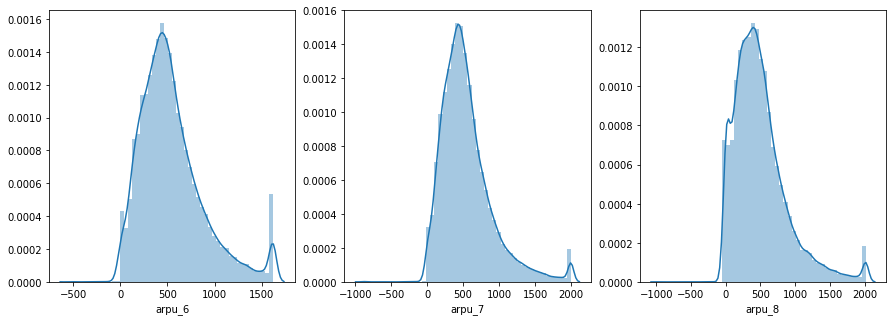

In [281]:
plot_distplot(derived_data.arpu_6, derived_data.arpu_7, derived_data.arpu_8)

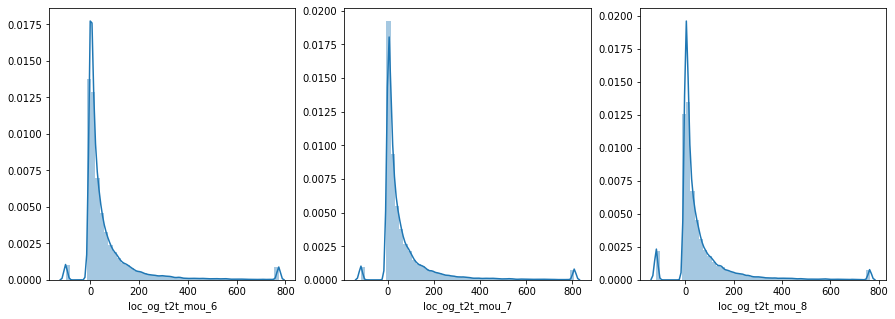

In [282]:
 plot_distplot(derived_data.loc_og_t2t_mou_6, derived_data.loc_og_t2t_mou_7, derived_data.loc_og_t2t_mou_8)

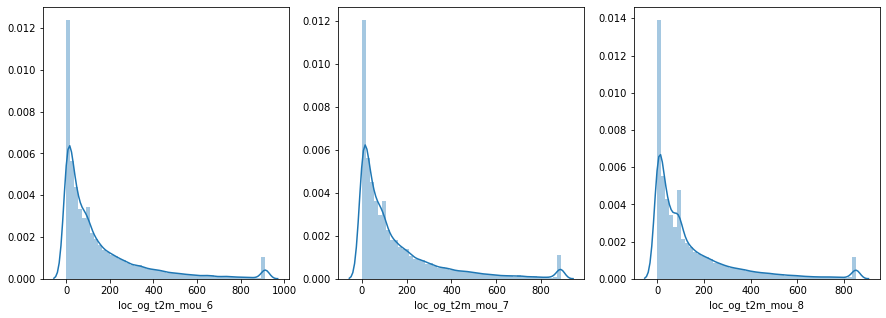

In [283]:
plot_distplot(derived_data.loc_og_t2m_mou_6, derived_data.loc_og_t2m_mou_7, derived_data.loc_og_t2m_mou_8)

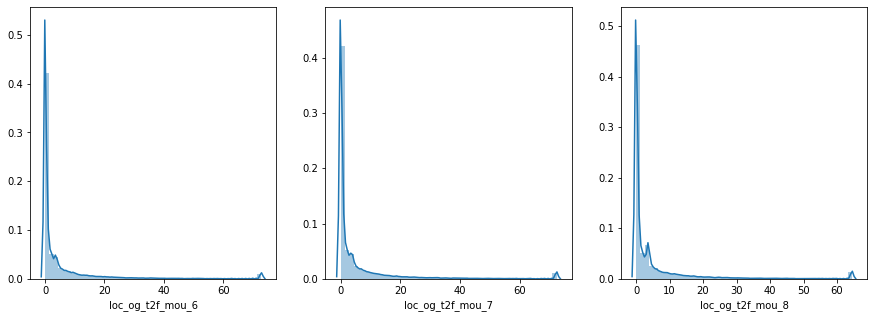

In [284]:
plot_distplot(derived_data.loc_og_t2f_mou_6, derived_data.loc_og_t2f_mou_7, derived_data.loc_og_t2f_mou_8)

**Insights**

We can see that the data was mostly skewed but has been somewhat handled by capping the outliers.

### Bivariate EDA <a class ="anchor" id="bv"></a>

In [286]:
# create box plot 
def plot_box_chart(feature):
    plt.figure(figsize=(20,16))
    plt.subplot(2,3,1)
    sns.boxplot(data=derived_data, y=feature+"_6",x="churn",hue="churn",
                showfliers=False)
    plt.subplot(2,3,2)
    sns.boxplot(data=derived_data, y=feature+"_7",x="churn",hue="churn",
                showfliers=False,palette="Blues")
    plt.subplot(2,3,3)
    sns.boxplot(data=derived_data, y=feature+"_8",x="churn",hue="churn",
                showfliers=False,palette="plasma")
    plt.show()

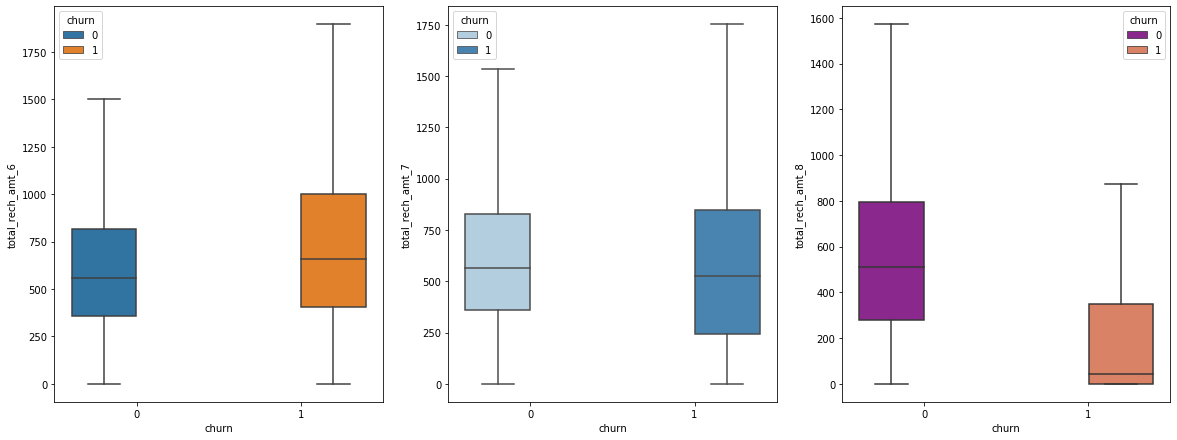

In [287]:
# Box Plot for total recharge amount:
plot_box_chart('total_rech_amt')

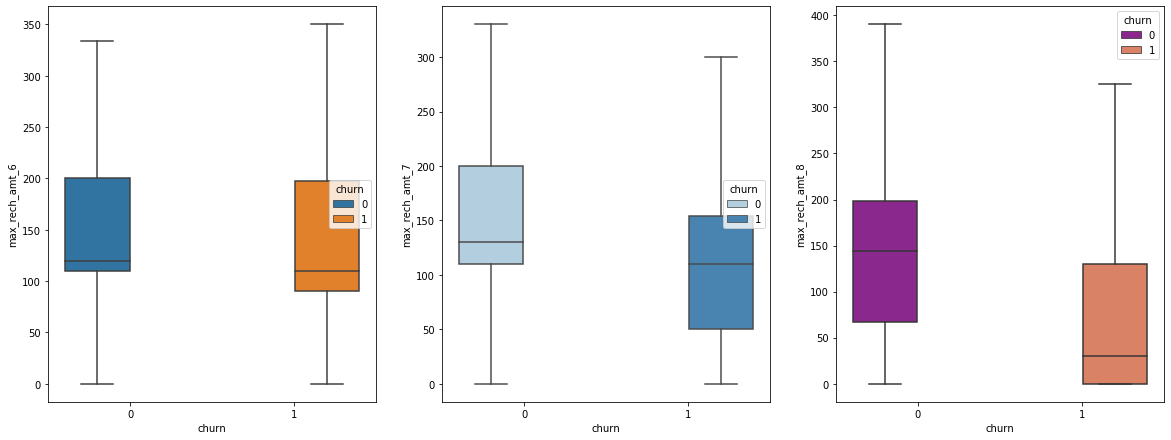

In [288]:
# Box Plot for max  recharge amount:
plot_box_chart('max_rech_amt')

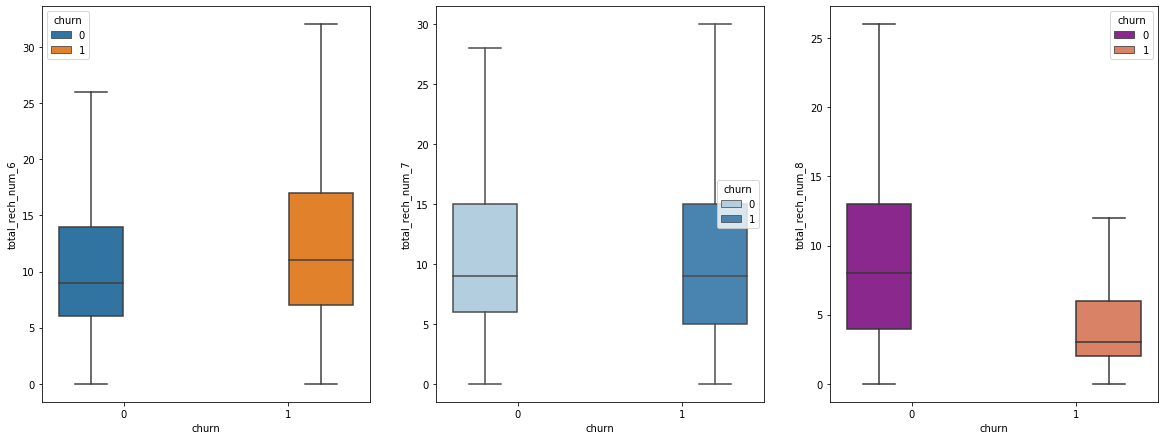

In [289]:
# Ploting for Total recharge for Number:
plot_box_chart('total_rech_num')

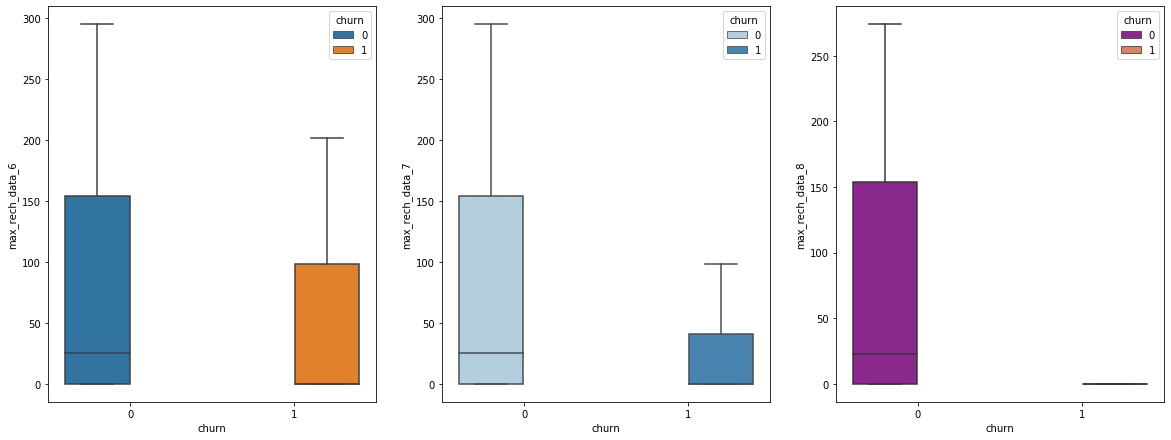

In [290]:
# Ploting for maximum recharge for data:
plot_box_chart('max_rech_data')

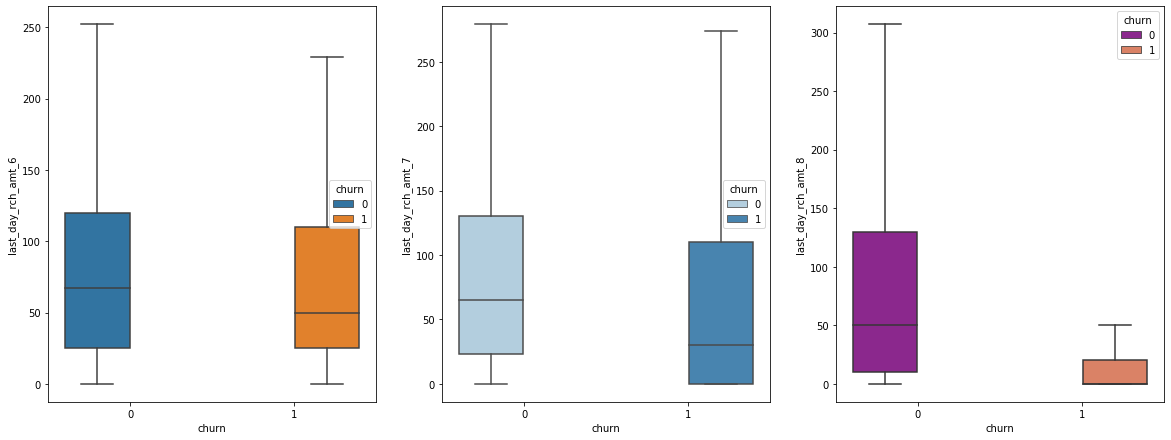

In [291]:
# Ploting for last day recharge amount:
plot_box_chart('last_day_rch_amt')

**Insights**

Looking at the above charts, its clear that the total_rech_amt, max_rech_amt, total_rech_num, max_rech_data, last_rech_amt is all low in the action phase for the churned customers. That means the customers tends to reduce his activity just befor churning out.

## Modelling <a class ="anchor" id="mod"></a>

### Train-Test Split <a class = "anchor" id = "tts"></a>

In [213]:
X = derived_data.drop("churn", axis = 1)
y = derived_data.churn

# Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [214]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_tes shape: ", y_test.shape)

X_train shape:  (21000, 173)
y_train shape:  (21000,)
X_test shape:  (9001, 173)
y_tes shape:  (9001,)


In [215]:
# Hangling the categorical variables: Mapping the mean of target variable to the category of each categorical variable.
# This way we are converting the categorical variables into meaninful numerical variable
# Finding the mean of churn for each category in all categorical variables

train = pd.concat([X_train, y_train], axis = 1)

print(train.groupby('night_pck_user_6').churn.mean())
print(train.groupby('night_pck_user_7').churn.mean())
print(train.groupby('night_pck_user_8').churn.mean())
print(train.groupby('fb_user_6').churn.mean())
print(train.groupby('fb_user_7').churn.mean())
print(train.groupby('fb_user_8').churn.mean())

night_pck_user_6
-999.0    0.098459
 0.0      0.066684
 1.0      0.105263
Name: churn, dtype: float64
night_pck_user_7
-999.0    0.113334
 0.0      0.056683
 1.0      0.068592
Name: churn, dtype: float64
night_pck_user_8
-999.0    0.142160
 0.0      0.027740
 1.0      0.032922
Name: churn, dtype: float64
fb_user_6
-999.0    0.098459
 0.0      0.075792
 1.0      0.067026
Name: churn, dtype: float64
fb_user_7
-999.0    0.113334
 0.0      0.069719
 1.0      0.055840
Name: churn, dtype: float64
fb_user_8
-999.0    0.142160
 0.0      0.058425
 1.0      0.024236
Name: churn, dtype: float64


In [151]:
# Replacing the category with respective mean churn
mapping = {'night_pck_user_6': {-999: 0.098459, 0: 0.066684, 1: 0.105263},
          'night_pck_user_7': {-999: 0.113334, 0: 0.056683, 1: 0.068592},
          'night_pck_user_8': {-999: 0.142160, 0: 0.027740, 1: 0.032922},
          'fb_user_6': {-999: 0.098459, 0: 0.075792, 1: 0.067026},
          'fb_user_7': {-999: 0.113334, 0: 0.069719, 1: 0.055840},
          'fb_user_8': {-999: 0.142160, 0: 0.058425, 1: 0.024236}
         }

X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

### SMOTE <a class = "anchor" id = "smote"></a>

In [152]:
print(y_train.value_counts()*100/y_train.shape[0])

0    91.861905
1     8.138095
Name: churn, dtype: float64


We can see that out data is highly imbalance. Hence we will have to use some analysis to handle this.

**SMOTE (Synthetic Minority Over-sampling Technique)** is an over-sampling method. What it does is, it creates synthetic (not duplicate) samples of the minority class. Hence making the minority class equal to the majority class. SMOTE does this by selecting similar records and altering that record one column at a time by a random amount within the difference to the neighbouring records.

In [153]:
os = SMOTE(random_state = 0)
columns = X_train.columns

os_data_X, os_data_y = os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data = os_data_X, columns = columns)
os_data_y = pd.DataFrame(data = os_data_y, columns = ['churn'])

In [154]:
print("length of oversampled data is: ", len(os_data_X))
print("Number of non-churned in oversampled data: ", len(os_data_y[os_data_y['churn']==0]))
print("Number of churned: ", len(os_data_y[os_data_y['churn']==1]))
print("Proportion of non-churned data in oversampled data is: ",len(os_data_y[os_data_y['churn']==0])/len(os_data_X))
print("Proportion of churned data in oversampled data is: ",len(os_data_y[os_data_y['churn']==1])/len(os_data_X))

length of oversampled data is:  38582
Number of non-churned in oversampled data:  19291
Number of churned:  19291
Proportion of non-churned data in oversampled data is:  0.5
Proportion of churned data in oversampled data is:  0.5


### Scaling the dataset <a class ="anchor" id="scale"></a>

In [155]:
scaler = StandardScaler()
scaled_train_df = scaler.fit_transform(os_data_X)
scaled_test_df = scaler.transform(X_test)

In [156]:
scaled_train_df = pd.DataFrame(scaled_train_df, columns = columns)
scaled_test_df = pd.DataFrame(scaled_test_df, columns = columns)

### PCA <a class ="anchor" id="pca"></a>

In [157]:
# Make an instance of the Model
# to get the pca components which explain 95% varience in our data
pca = PCA(.95)

In [158]:
pca.fit(scaled_train_df)

train_pca = pca.transform(scaled_train_df)
test_pca = pca.transform(scaled_test_df)

In [159]:
print(train_pca.shape)
print(test_pca.shape)

(38582, 68)
(9001, 68)


We are able to explain 95% of varience with 68 pca components in out dataset

### Model 1 - Logestic Regression <a class ="anchor" id="model1"></a>

In [162]:
# Creating an instance for logreg model with solver = liblinear
logisticRegr = LogisticRegression(solver = 'liblinear')

In [163]:
logisticRegr.fit(train_pca, os_data_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [165]:
# prediction the trained model on test set

y_pred_logreg = logisticRegr.predict(test_pca)

In [166]:
# Evaluating the model

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(test_pca, y_test)))

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_logreg, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = logisticRegr.predict_proba(test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Accuracy of logistic regression classifier on test set: 0.85
[[7079 1190]
 [ 149  583]]
Sensitivity: 	0.8
Specificity: 	0.86
AUC:    	 0.9


In [167]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      8269
           1       0.33      0.80      0.47       732

    accuracy                           0.85      9001
   macro avg       0.65      0.83      0.69      9001
weighted avg       0.93      0.85      0.88      9001



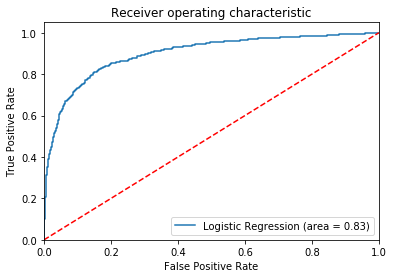

In [168]:
logisticRegr_roc_auc = roc_auc_score(y_test, logisticRegr.predict(test_pca))
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(test_pca)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logisticRegr_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Model 2 - Logestic Regression with GridSearch <a class ="anchor" id="model2"></a>

In [169]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C = C, penalty = penalty)

In [170]:
# Create grid search using 5-fold cross validation

logreg_GS = GridSearchCV(logisticRegr, hyperparameters, cv = 5, verbose = 0)

In [172]:
# Fit grid search
best_model = logreg_GS.fit(train_pca, os_data_y)

In [173]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 1.0


In [174]:
y_pred_GridSearch_logreg = best_model.predict(test_pca)

In [175]:
# Evaluating the model

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(best_model.score(test_pca, y_test)))

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_GridSearch_logreg)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_GridSearch_logreg, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = best_model.predict_proba(test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Accuracy of logistic regression classifier on test set: 0.85
[[7077 1192]
 [ 149  583]]
Sensitivity: 	0.8
Specificity: 	0.86
AUC:    	 0.9


In [176]:
print(classification_report(y_test, y_pred_GridSearch_logreg))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      8269
           1       0.33      0.80      0.47       732

    accuracy                           0.85      9001
   macro avg       0.65      0.83      0.69      9001
weighted avg       0.93      0.85      0.88      9001



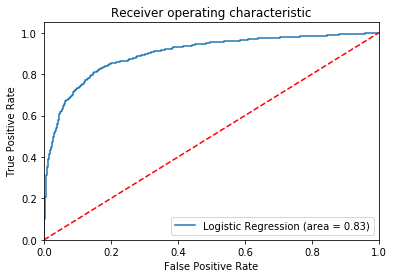

In [187]:
GridSearch_roc_auc = roc_auc_score(y_test, best_model.predict(test_pca))
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(test_pca)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % GridSearch_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Model 3 - Random Forest <a class ="anchor" id="model3"></a>

In [179]:
forest = RandomForestClassifier(n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
rf_model = GridSearchCV(estimator = forest, cv = folds, param_grid = params, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

In [180]:
%%time

rf_model.fit(train_pca, os_data_y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.7min finished


CPU times: user 1min 11s, sys: 354 ms, total: 1min 11s
Wall time: 4min 52s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              o

In [182]:
print("Best AUC: ", rf_model.best_score_)
print("Best hyperparameters: ", rf_model.best_params_)

Best AUC:  0.9915028541902181
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'auto'}


In [184]:
# predict churn on test data
y_pred_rf = rf_model.predict(test_pca)

In [185]:
# Evaluating the model

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(rf_model.score(test_pca, y_test)))

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_rf, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Accuracy of logistic regression classifier on test set: 0.89
[[7835  434]
 [ 323  409]]
Sensitivity: 	0.56
Specificity: 	0.95
AUC:    	 0.89


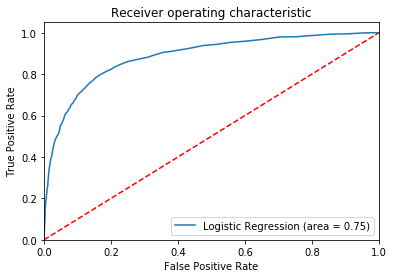

In [186]:
rf_roc_auc = roc_auc_score(y_test, rf_model.predict(test_pca))
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(test_pca)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

We see that with random forest we are geting low Sensitivity

With Logestic Regression we have good Sensitivity, Specificity and accuracy.

**Hence we will go with Logestic Regression for churn prediction.**

## Feature Importance <a class ="anchor" id="fi"></a>

Now, Lets run RFE to get the most important features from our dataset

In [216]:
churned_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
0,197.385,214.816,213.803000,-95.523694,-81.933316,0.00,143.940499,133.173097,0.00,28.340996,12.007736,0.00,32.644014,12.326228,0.00,-99.900245,-117.340904,0.00,93.344423,91.390566,0.00,3.745485,3.789595,0.00,2.427211,-2.27198,0.00,-2.89554,-22.166004,0.00,30.608504,33.136822,0.00,87.304948,90.793295,0.00,1.121699,1.134285,0.00,119.023043,125.07822,0.00,-120.396291,-107.924792,0.00,3.910109,4.972477,0.00,0.442833,0.048762,0.0,0.00,0.00,0.00,-58.910779,-63.906382,0.16,107.474312,107.11681,4.13,12.085328,12.602212,1.15,60.572055,55.776673,5.44,-23.057781,-23.192459,0.00,20.721782,21.654634,0.00,2.156151,2.219279,0.00,-0.185407,0.680401,0.00,0.00,0.00,5.44,-28.275562,-26.801853,0.0,7.068034,7.406396,0.00,0.853743,1.011818,0.00,4.0,3.0,2.0,362.0,252.0,252.000000,252.000000,252.000000,252.00000,252.0,252.0,252.000000,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1
1,1069.180,1349.850,2014.483901,57.840000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,33.490000,31.64,23.740000,12.590000,38.06,51.390000,31.380000,40.28,308.630000,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.00000,0.00,422.16000,533.910000,255.79,4.300000,23.290000,12.01,49.890000,31.760000,49.14,6.660000,20.080000,16.68,60.860000,75.14000,77.84,0.000000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.49000,121.19,152.160000,101.460000,39.53,427.880000,355.230000,188.04,36.890000,11.830000,30.39,91.440000,126.990000,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,626.46,558.04,428.74,0.210000,0.000000,0.0,2.060000,14.530000,31.59,15.740000,15.190000,15.14,5.0,5.0,7.0,1580.0,790.0,2418.103175,695.232696,716.373953,679.76786,0.0,0.0,5

In [219]:
X = churned_data.drop("churn", axis = 1)
y = churned_data.churn

# Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [220]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_tes shape: ", y_test.shape)

X_train shape:  (21000, 145)
y_train shape:  (21000,)
X_test shape:  (9001, 145)
y_tes shape:  (9001,)


In [222]:
# Replacing the category with respective mean churn
mapping = {'night_pck_user_6': {-999: 0.098459, 0: 0.066684, 1: 0.105263},
          'night_pck_user_7': {-999: 0.113334, 0: 0.056683, 1: 0.068592},
          'night_pck_user_8': {-999: 0.142160, 0: 0.027740, 1: 0.032922},
          'fb_user_6': {-999: 0.098459, 0: 0.075792, 1: 0.067026},
          'fb_user_7': {-999: 0.113334, 0: 0.069719, 1: 0.055840},
          'fb_user_8': {-999: 0.142160, 0: 0.058425, 1: 0.024236}
         }

X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [223]:
os = SMOTE(random_state = 0)
columns = X_train.columns

os_data_X, os_data_y = os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data = os_data_X, columns = columns)
os_data_y = pd.DataFrame(data = os_data_y, columns = ['churn'])

In [224]:
scaler = StandardScaler()
scaled_train_df = scaler.fit_transform(os_data_X)
scaled_test_df = scaler.transform(X_test)

In [225]:
scaled_train_df = pd.DataFrame(scaled_train_df, columns = columns)
scaled_test_df = pd.DataFrame(scaled_test_df, columns = columns)

In [227]:
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()

# create the RFE model and select 3 attributes
rfe = RFE(model, 10)
rfe = rfe.fit(scaled_train_df, os_data_y)

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False  True  True False  True
 False False False  True  True False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False  True False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False]
[101  65   5  76  10  22  11  78  21  77  47 103 119 104  24  46  53  19
  52  55   8  93  83  84 112 102  94  45  5

In [231]:
list(zip(scaled_train_df.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 101),
 ('arpu_7', False, 65),
 ('arpu_8', False, 5),
 ('onnet_mou_6', False, 76),
 ('onnet_mou_7', False, 10),
 ('onnet_mou_8', False, 22),
 ('offnet_mou_6', False, 11),
 ('offnet_mou_7', False, 78),
 ('offnet_mou_8', False, 21),
 ('roam_ic_mou_6', False, 77),
 ('roam_ic_mou_7', False, 47),
 ('roam_ic_mou_8', False, 103),
 ('roam_og_mou_6', False, 119),
 ('roam_og_mou_7', False, 104),
 ('roam_og_mou_8', False, 24),
 ('loc_og_t2t_mou_6', False, 46),
 ('loc_og_t2t_mou_7', False, 53),
 ('loc_og_t2t_mou_8', False, 19),
 ('loc_og_t2m_mou_6', False, 52),
 ('loc_og_t2m_mou_7', False, 55),
 ('loc_og_t2m_mou_8', False, 8),
 ('loc_og_t2f_mou_6', False, 93),
 ('loc_og_t2f_mou_7', False, 83),
 ('loc_og_t2f_mou_8', False, 84),
 ('loc_og_t2c_mou_6', False, 112),
 ('loc_og_t2c_mou_7', False, 102),
 ('loc_og_t2c_mou_8', False, 94),
 ('loc_og_mou_6', False, 45),
 ('loc_og_mou_7', False, 54),
 ('loc_og_mou_8', False, 20),
 ('std_og_t2t_mou_6', False, 13),
 ('std_og_t2t_mou_7', False, 

In [235]:
top_features = scaled_train_df.columns[rfe.support_]

In [251]:
X_train = scaled_train_df[top_features]
X_test = scaled_test_df[top_features]

In [264]:
log_reg = LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear')

In [265]:
log_reg.fit(X_train, os_data_y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [266]:
y_pred_log_reg = log_reg.predict(X_test)

In [267]:
# Evaluating the model

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test, y_test)))

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_log_reg)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_log_reg, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Accuracy of logistic regression classifier on test set: 0.79
[[6543 1726]
 [ 133  599]]
Sensitivity: 	0.82
Specificity: 	0.79
AUC:    	 0.88


### Extract the intercept and the coefficients from the logistic model <a class ="anchor" id="impfeat"></a>

In [268]:
# intercept
intercept_df = pd.DataFrame(log_reg.intercept_.reshape((1,1)), columns = ['intercept'])

In [272]:
# coefficients
coefficients = log_reg.coef_.reshape((10, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(log_reg.coef_, columns=logistic_features)

In [273]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,loc_ic_t2t_mou_6,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_8,loc_ic_mou_6,loc_ic_mou_7,spl_ic_mou_8,count_rech_2g_8,av_rech_amt_data_8,sachet_2g_8
0,-0.11896,0.629189,-1.014896,1.207916,-1.988456,-1.385496,0.947942,-1.431109,-1.529751,-0.72056,1.209713


- The telecom company need to give attention to local incoming calls fecility as customer tends to use it more often.
- And if the local incoming mou reduces in the action phase, the company needs to give attention to these customers as they are probably going to churn.

## Conclusion <a class ="anchor" id="con"></a>

The best model to predict the churn customers is **Logestic Regression with PCA** with following metrics

- Accuray - 88%
- Sensitivity: 80% 
- Specificity: 86% 
- AUC - 90%

The most important feature for prediction churn customers are:
- local incoming minutes of usage for the good and action phase for within same operator and to other operator mobile.
- count of reacharge of 2g in action phase
- average recharge amount for data in action phase
- customers using sachet scheme in the action phase